In [200]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request
import io

In [201]:
medium_dataset_url = "https://liacs.leidenuniv.nl/~takesfw/SNACS/medium.tsv"
large_dataset_url = "https://liacs.leidenuniv.nl/~takesfw/SNACS/large.tsv"

In [202]:
m_response = urllib.request.urlopen(medium_dataset_url)
m_data = m_response.read().decode('utf-8')

l_response = urllib.request.urlopen(large_dataset_url)
l_data = l_response.read().decode('utf-8')

G_m = nx.parse_edgelist(io.StringIO(m_data), nodetype=int, delimiter='\t') 
G_l = nx.parse_edgelist(io.StringIO(l_data), nodetype=int, delimiter='\t') 

In [203]:
# Question 1 
print('The number of directed links for the medium dataset is: ', G_m.number_of_edges())

print('The number of directed links for the large dataset is: ', G_l.number_of_edges())

The number of directed links for the medium dataset is:  10723
The number of directed links for the large dataset is:  110474


In [204]:
# Question 2
print('The number of nodes for the medium dataset is: ', G_m.number_of_nodes())

print('The number of nodes for the large dataset is: ', G_l.number_of_nodes())

The number of nodes for the medium dataset is:  5895
The number of nodes for the large dataset is:  41767


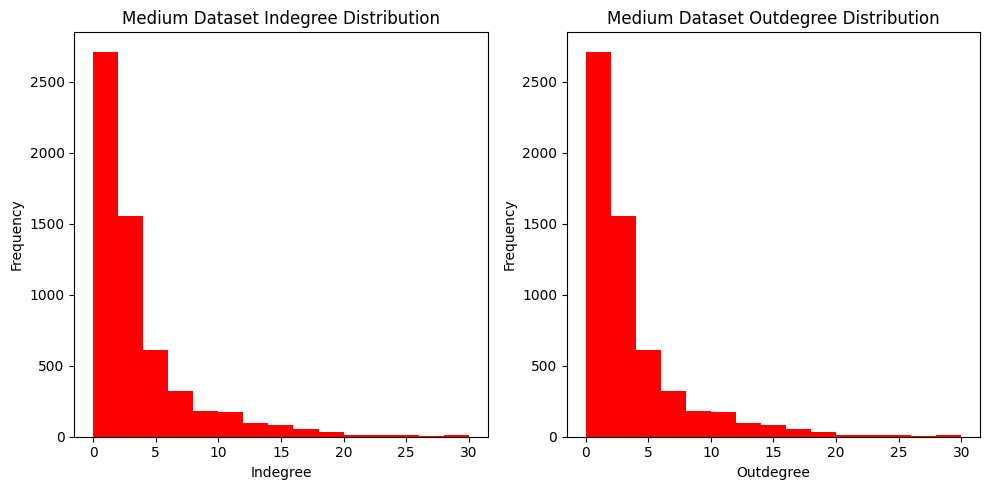

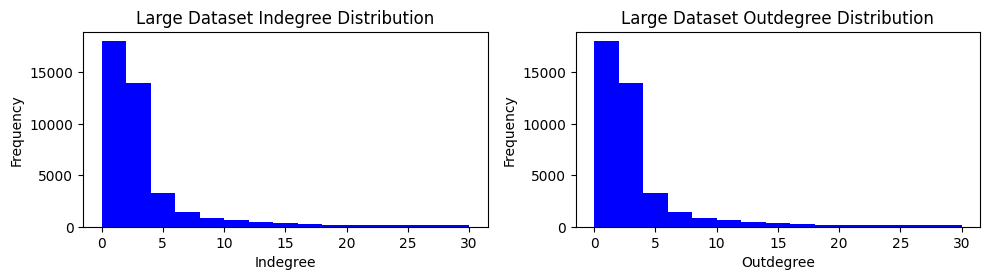

In [205]:
# Question 3

custom_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

#medium 
D_G_m = nx.DiGraph(G_m)

m_indegrees = dict(D_G_m.in_degree())
m_outdegrees = dict(D_G_m.out_degree())
#large
D_G_l = nx.DiGraph(G_l)

l_indegrees = dict(D_G_l.in_degree())
l_outdegrees = dict(D_G_l.out_degree())

# diagrams for medium dataset
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(list(m_indegrees.values()), bins=custom_bins, color='r')
plt.title('Medium Dataset Indegree Distribution')
plt.xlabel('Indegree')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(list(m_outdegrees.values()), bins=custom_bins, color='r')
plt.title('Medium Dataset Outdegree Distribution')
plt.xlabel('Outdegree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# diagrams for large dataset

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.hist(list(l_indegrees.values()), bins=custom_bins, color='b')
plt.title('Large Dataset Indegree Distribution')
plt.xlabel('Indegree')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(list(l_outdegrees.values()), bins=custom_bins, color='b')
plt.title('Large Dataset Outdegree Distribution')
plt.xlabel('Outdegree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [206]:
# Question 4
# Use Directed Graphs again

# Weakly connected components
m_weakly_connected_components = list(nx.weakly_connected_components(D_G_m))
l_weakly_connected_components = list(nx.weakly_connected_components(D_G_l))

# Strongly connected components
m_strongly_connected_components = list(nx.strongly_connected_components(D_G_m))
l_strongly_connected_components = list(nx.strongly_connected_components(D_G_l))

# Largest weakly connected component
m_largest_weakly_connected_component = max(m_weakly_connected_components, key=len)
l_largest_weakly_connected_component = max(l_weakly_connected_components, key=len)

# Largest strongly connected component
m_largest_strongly_connected_component = max(m_strongly_connected_components, key=len)
l_largest_strongly_connected_component = max(l_strongly_connected_components, key=len)

# Get the number of nodes and links in the largest weakly connected component
m_num_nodes_largest_weakly = len(m_largest_weakly_connected_component)
m_num_links_largest_weakly = D_G_m.subgraph(m_largest_weakly_connected_component).number_of_edges()
l_num_nodes_largest_weakly = len(l_largest_weakly_connected_component)
l_num_links_largest_weakly = D_G_l.subgraph(l_largest_weakly_connected_component).number_of_edges()

# Get the number of nodes and links in the largest strongly connected component
m_num_nodes_largest_strongly = len(m_largest_strongly_connected_component)
m_num_links_largest_strongly = D_G_m.subgraph(m_largest_strongly_connected_component).number_of_edges()
l_num_nodes_largest_strongly = len(l_largest_strongly_connected_component)
l_num_links_largest_strongly = D_G_l.subgraph(l_largest_strongly_connected_component).number_of_edges()

# Print the results
print("Number of weakly connected components - Medium Dataset:", len(m_weakly_connected_components))
print("Number of strongly connected components - Medium Dataset:", len(m_strongly_connected_components))
print("Number of nodes in the largest weakly connected component - Medium Dataset:", m_num_nodes_largest_weakly)
print("Number of links in the largest weakly connected component - Medium Dataset:", m_num_links_largest_weakly)
print("Number of nodes in the largest strongly connected component - Medium Dataset:", m_num_nodes_largest_strongly)
print("Number of links in the largest strongly connected component - Medium Dataset:", m_num_links_largest_strongly)
print('-------------------------------------------------------------------------------------------------------------------------')
print("Number of weakly connected components - Large Dataset:", len(l_weakly_connected_components))
print("Number of strongly connected components - Large Dataset:", len(l_strongly_connected_components))
print("Number of nodes in the largest weakly connected component - Large Dataset:", l_num_nodes_largest_weakly)
print("Number of links in the largest weakly connected component - Large Dataset:", l_num_links_largest_weakly)
print("Number of nodes in the largest strongly connected component - Large Dataset:", l_num_nodes_largest_strongly)
print("Number of links in the largest strongly connected component - Large Dataset:", l_num_links_largest_strongly)

Number of weakly connected components - Medium Dataset: 200
Number of strongly connected components - Medium Dataset: 200
Number of nodes in the largest weakly connected component - Medium Dataset: 5265
Number of links in the largest weakly connected component - Medium Dataset: 20504
Number of nodes in the largest strongly connected component - Medium Dataset: 5265
Number of links in the largest strongly connected component - Medium Dataset: 20504
-------------------------------------------------------------------------------------------------------------------------
Number of weakly connected components - Large Dataset: 647
Number of strongly connected components - Large Dataset: 647
Number of nodes in the largest weakly connected component - Large Dataset: 39660
Number of links in the largest weakly connected component - Large Dataset: 217908
Number of nodes in the largest strongly connected component - Large Dataset: 39660
Number of links in the largest strongly connected component 

In [207]:
# Question 5

m_indegree_cluster = nx.clustering(D_G_m, nodes=D_G_m.nodes())
m_outdegree_cluster = nx.clustering(D_G_m, nodes=D_G_m.nodes())
l_indegree_cluster = nx.clustering(D_G_l, nodes=D_G_l.nodes())
l_outdegree_cluster = nx.clustering(D_G_l, nodes=D_G_l.nodes())

m_avg_indegree_cluster = sum(m_indegree_cluster.values()) / len(m_indegree_cluster)
m_avg_outdegree_cluster = sum(m_outdegree_cluster.values()) / len(m_outdegree_cluster)
l_avg_indegree_cluster = sum(l_indegree_cluster.values()) / len(l_indegree_cluster)
l_avg_outdegree_cluster = sum(l_outdegree_cluster.values()) / len(l_outdegree_cluster)

m_average_cluster = (m_avg_indegree_cluster + m_avg_outdegree_cluster) / 2
l_average_cluster = (l_avg_indegree_cluster + l_avg_outdegree_cluster) / 2

print("Average Clustering Coefficient for Medium Dataset:", m_average_cluster)
print("Average Clustering Coefficient for Large Dataset:", l_average_cluster)

Average Clustering Coefficient for Medium Dataset: 0.20056701987677367
Average Clustering Coefficient for Large Dataset: 0.2997545617318172


In [ ]:
# Question 6

m_largest_weakly_subgraph = D_G_m.subgraph(m_largest_weakly_connected_component)
l_largest_weakly_subgraph = D_G_l.subgraph(l_largest_weakly_connected_component)

m_path_lengths = []
for node in m_largest_weakly_subgraph.nodes():
    m_shortest_paths = nx.single_source_shortest_path_length(m_largest_weakly_subgraph, node)
    m_path_lengths.extend(m_shortest_paths.values())
    
l_path_lengths = []
for node in l_largest_weakly_subgraph.nodes():
    l_shortest_paths = nx.single_source_shortest_path_length(l_largest_weakly_subgraph, node)
    l_path_lengths.extend(l_shortest_paths.values())

plt.hist(m_path_lengths, bins=custom_bins, alpha=0.7, color='r', edgecolor='black')
plt.title('Largest Weakly Connected Comp. Distance Distribution for Medium Network')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

plt.hist(l_path_lengths, bins=custom_bins, alpha=0.7, color='b', edgecolor='black')
plt.title('Largest Weakly Connected Comp. Distance Distribution for Large Network')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Question 7
m_average_distance = sum(m_path_lengths) / len(m_path_lengths)
l_average_distance = sum(l_path_lengths) / len(l_path_lengths)

print("Average Distance between Node Pairs - Medium Network:", m_average_distance)
print("Average Distance between Node Pairs - Large Network:", l_average_distance)